### MSCI446 Final Project
Calum Hrabi

John Kachura

Elize Kooij

Thomas Kleinknect



# Introduction

  The goal of our project is to develop a machine learning model which can predict the genre of a movie, based on an inputted string of text representing its title. A movie’s genre is a very defining characteristic and primary identifier of any film, old or new. We would like to determine just how accurately we can predict this primary identifier using another, less descriptive and more random identifier, the movie’s name. There are obvious cases in which this should be relatively simple, films with “ghost” or “scream” in the name, are most likely horror films, and movies with titles including  “love”, or “marriage”, are most likely romance films. But what happens when things stray from these direct relationships? What happens when a movie title includes combinations, such as “Screaming Laughing at the War Celebration”, or single worded titles, such as “Hairspray”? We aim to explore how accurate we can make our predictions and reveal possible tendencies towards certain genres.
This project can provide important insights as movie genres are key factors of how they are categorized, marketed, and consumed by audiences. It grabs the viewer’s attention, leads them to quickly grasp the type of movie they are expecting to watch, and helps their decision making process to select a movie. Our model will also allow us to bridge the gap of ambiguous movie titles, and create or discover existing relationships between the title and the genre of a movie. Successfully creating a working model can help movie marketing teams or creative advertising agencies ensure a movie title is emitting the right genre and targeting their intended audience. Some additional real world applications we envision for this model would serve in the context of movie search engineers, discovery platforms, and enhancing user experience/engagement.

  To successfully create a working model for our project, we will be using a supervised learning model, applying Naive Bayes and Multinomial Logistic Regression algorithms since we are conducting classification with many genre possibilities. This allows us to train the model to draw patterns from these titles, and given different considerations and possible limitations, we will have to determine which model is best suited for the task. Any model is only as good as its data, so we set out to search for a dataset which gave us the best chances at success, by providing us with trustworthy data.
  
  In summation, with our main objective in mind - to create a model to predict a movie’s genre based on an inputted title, there were also a plethora of different factors to take into consideration in order to reach as much accuracy as possible. At many stages of this project, important decision making took place, with regards to data processing, attempts at models and how to best measure accuracy. We will discuss in our report which approaches worked best, challenges and limitations we faced.


Install Packages

In [ ]:
!pip install pandarallel
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 3.3 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.4-py3-none-any.whl size=16677 sha256=15fca4d7824ca1d1d6ce547588dadd68d05d8956a68670fcc098a307d01b5989
  Stored in directory: /root/.cache/pip/wheels/41/01/29/deaa71fe596f8d857e57c4fb388db8861e23e6ed0b03204dcb
Successfully built pandarallel
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Data Description

The raw dataset we chose to work with is made up of 10 million rows of movies, shorts, television series and episodes, sourced from the infamous IMDb (source). This dataset includes movies from 1874 up to present day, each of which are tagged by up to 3 genres they correspond to. With this large dataset at our disposal, there were many data cleaning and manipulation steps we had to conduct to make the data suitable to then apply machine learning models.

As mentioned in our proposal, we started by removing the titles that go too far back in time, as very old movies were drastically different from what is common today, and we are aiming to capture more modern trends in movie naming trends. We removed all titles that were released prior to 1920. To further narrow our dataset, we removed TV episodes, shorts and adult films, as they provide little contribution to naming and we would rather focus solely on movie titles. These were relatively simple to remove, because the dataset includes a titleType column (identifying shorts and episodes) as well as a boolean characteristic, isAdult. We also decided to trim the list of available genres, as some of them are quite niche (ie. experimental, news, history etc.) and helps our model be more general. This was able to be completed because most titles are still tagged by at least one more genre that applies to it (ie. Action, Comedy, Experimental).

One of the more challenging data cleaning steps we had to conduct was removing the  non-english language titles (which are quite common), as there is no existing column that displays the language of the movie. We chose to leverage a Python library called Langdetect to filter our data and only keep the movie titles written in english. Once we ran Langdetect, it significantly reduced our dataset, leaving us with 510,000 data points.

These initial steps of data cleaning were done in a previous file and exported to a new CSV titled "data_with_lang_csv" as it took a long time to complete so we did not want to run it everytime this file was ran


### Read In Data

We uploaded the data along with our submission, all you need to do is change the path, in p.read_csv() to link to that data. If you want to use put the data in your main drive folder, and the code we have should work for you. You will have to sign in to drive after running the code block above


In [ ]:
import pandas as p
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
mpl.rcParams['agg.path.chunksize'] = 10000

#Read Data From My Google Drive
#Please change the path to the data set we provided
data = p.read_csv("/content/drive/MyDrive/data_with_lang_csv.csv")
data.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,lang
0,tt0003854,movie,Dodge City Trail,Dodge City Trail,0,1936.0,\N,56.0,"Adventure,Music,Western",en
1,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,\N,NaN,"Action,Crime",de
2,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021.0,\N,133.0,Documentary,sk
3,tt0015724,movie,Dama de noche,Dama de noche,0,1993.0,\N,102.0,"Drama,Mystery,Romance",de
4,tt0016029,movie,The Little Colonel,The Little Colonel,0,1935.0,\N,81.0,"Comedy,Family,Music",en
5,tt0017961,movie,Happiness,Schaste,0,1935.0,\N,95.0,"Comedy,Drama",fi
6,tt0018867,movie,Escape from Hong Kong,Escape from Hong Kong,0,1942.0,\N,60.0,"Adventure,Mystery,War",en
7,tt0019094,movie,Life's a Stage,Life's a Stage,0,1930.0,\N,NaN,"Crime,Drama",en
8,tt0019403,movie,Salt for Svanetia,Jim Shvante (marili svanets),0,1930.0,\N,55.0,Documentary,no
9,tt0019618,movie,48 pesetas de taxi,48 pesetas de taxi,0,1930.0,\N,NaN,Comedy,pt


In [ ]:
#Function to convert List to 1D so we can count it
def to_1D(series):
 return p.Series([x for _list in series for x in _list])

In the block of code below we can see the distrubution of genres

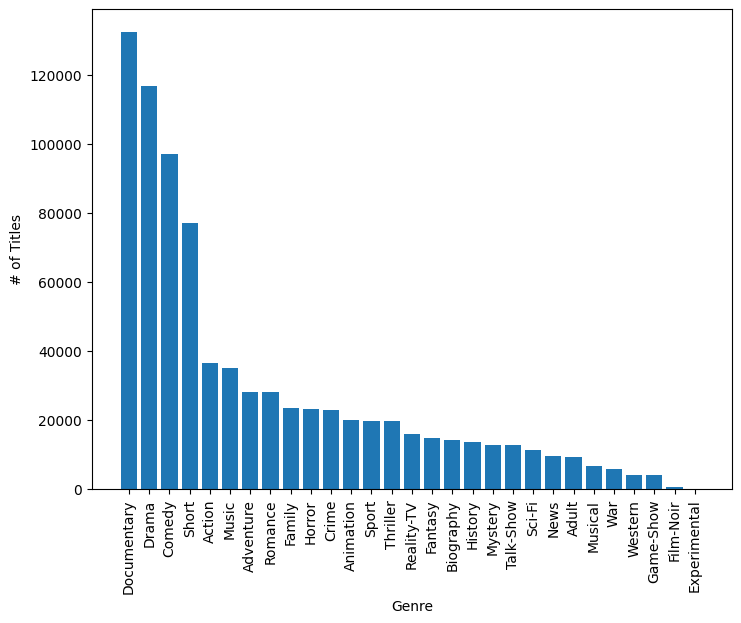

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genres = to_1D(data['genres']).value_counts().index.tolist()
count = to_1D(data['genres']).value_counts().values
ax.bar(genres,count)
plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('# of Titles')
plt.show()

In [ ]:
#Function to convert input string to list
def clean_alt_list(input_string):
    output = input_string.split(",")
    return output

In [ ]:
#Function to convert input string to list with whitespace instad of comma
def clean_alt_list_space(input_string):
    output = input_string.split()
    return output

In [ ]:
#Removes special characters from string
def remove_special(input):
  return re.sub(r'[^A-Za-z0-9 ]+', '', input)

### Remove non-english titles, make genres a list object

In [ ]:
data = data[data.lang == "en"]
data['primaryTitle'] = data['primaryTitle'].apply(remove_special)
data['genres'] = data['genres'].apply(clean_alt_list)

### Removing stop words

After completing the data cleaning steps mentioned, we used NLTK to tokenize each individual word in the movie titles, which involved breaking down titles into individual words to create a list of tokens. This allowed us to work with individual words rather than the entire title, allowing us to apply ML algorithms with ease.

To continue our text pre-processing, we removed common stop-words like “the” and “a” using the Natural Language Toolkit (NLTK) library. This removes the low-level information and allows us to place more emphasis on words that are likelier to correspond to a genre.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

#Function to remove stop words from tokenized string
def remove_stop_word(word_tokens):
  stop_words = set(stopwords.words('english'))
  filtered_sentence = []
  for w in word_tokens:
    w = w.lower()
    if w not in stop_words:
        filtered_sentence.append(w)
  return filtered_sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Allows us to Multi-thread to speed up processes
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=3)

INFO: Pandarallel will run on 3 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
data['primaryTitleTokenize'] = data['primaryTitle'].parallel_apply(word_tokenize)

In [ ]:
data['primaryTitleTokenizeStopWords'] = data['primaryTitleTokenize'].parallel_apply(remove_stop_word)

In the block of code below we can see the most common words in our data set with stop words removed

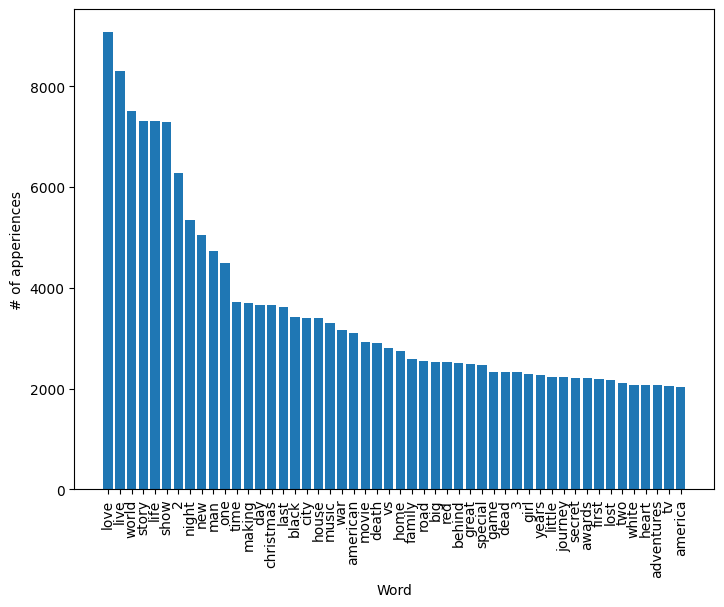

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genres = to_1D(data['primaryTitleTokenizeStopWords']).value_counts().head(50).index.tolist()
count = to_1D(data['primaryTitleTokenizeStopWords']).value_counts().head(50).values
ax.bar(genres,count)
plt.xticks(rotation='vertical')
plt.xlabel('Word')
plt.ylabel('# of apperiences')
plt.show()

### Stemming
The next step was to complete word stemming. The process involved reducing each word to its root or base form, which normalizes the data and reduces the dimensionality of the dataset. Stemming the words makes it able to group words with similar meanings together and reduces the variations in the dataset, making it easier to find patterns in data. We have specifically removed -s, -ing, -te from the dataset of titles. Finally vectorizing the text data into a numerical format that ML algorithms can understand.

In [ ]:
from nltk.stem import PorterStemmer
# create an object of class PorterStemmer
porter = PorterStemmer()

# Function to stem words in tokenized string
def lemmatizeList(list):
  output = []
  for word in list:
    output.append(porter.stem(word))
  return output

In [ ]:
data['primaryTitleTokenizedStemmed'] = data['primaryTitleTokenizeStopWords'].parallel_apply(lemmatizeList)

We must detokenize for vectorization

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
data["primaryTitle"] = data['primaryTitleTokenizeStopWords'].parallel_apply(TreebankWordDetokenizer().detokenize)

In [ ]:
dfCount_1s = data[data.genres.apply(len) == 1]
print("Titles with 1 genres: ", len(dfCount_1s.index))

dfCount_2s = data[data.genres.apply(len) == 2]
print("Titles with 2 genres: ", len(dfCount_2s.index))

dfCount_3s = data[data.genres.apply(len) == 3]
print("Titles with 3 genres: ", len(dfCount_3s.index))



Titles with 1 genres:  289980
Titles with 2 genres:  134546
Titles with 3 genres:  85935


### Data conclusion
We involved feature engineering to select and create relevant features from the available data to improve the accuracy of our model. Our project's target value is the genres and the features are the words found in the title. However, since many titles are tagged by multiple genres (2 Genres: 134546, 3 Genres: 85935), decisions are needed to determine how we would handle test entries with multiple genres. One option is to list multiple movies, each with the same name, one for each genre to train the model that the words in this movie’s title could correspond to any of these 2 or 3 genres. Another option we have is to run a process which randomly selects one of the 2/3 genres, and then trains the model on the randomized selection. Both options present their own difficulties in training and testing. One other alternative is to limit the number of genres in our model to minimize the number of multi-genre entries and improve the accuracy and functionality of the model.

Once the steps used to clean, transform, and feature engineer date, the dataset was now suitable for applying a number of different ML models to successfully predict the genre(s) of a movie based on a title


# Machine Learning
With the data now prepared for running the model, a new layer of complication has been added to the fold due to the issues encountered with multiple genres being assigned to movies. What this means however, with multiple ways of handling this issue in our arsenal, is that we had more options to consider, and hopefully, better results. In totality, we built and tested eight different models, four using the naive bayes algorithm, and four using multinomial regression. These models were chosen as they are both highly used in classification problems, and their structure works with the the fact that our only feature was the title.

### Model 1 & 2 (Note: Model 2 takes almost 40min to train so do not run it unless you want to wait)
 For each of these supervised learning algorithms, we first attempted the “duplication method” - duplicating titles in the entries in order to have an entry per genre which was listed for the film, and kept the complete list of 27 genres which were in the dataset. This would guide our next steps in the process and hopefully give us some insight.


In [ ]:
dataExploded = data.explode('genres', ignore_index=True)

Convert Text Classes Labels to Numeric Class Labels

In [ ]:
dataExploded['genresNumbered'] = p.factorize(dataExploded['genres'])[0] + 1

Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataExploded['primaryTitle'], dataExploded['genresNumbered'])

Vectorizing Primary Title

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

Training Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_1 = MultinomialNB()
naive_bayes_1.fit(training_data,y_train)

MultinomialNB()

Predict Test Data

In [ ]:
predictions = naive_bayes_1.predict(testing_data)


Get Accuracy Metrics

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy Score',accuracy_score(y_test,predictions))
print('Precision Score',precision_score(y_test,predictions, average='weighted'))
print('Recall Score',recall_score(y_test,predictions, average='weighted'))
print('F1 Score',f1_score(y_test,predictions, average='weighted'))

Accuracy Score 0.2654881990010773
Precision Score 0.26093601581035347


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score 0.2654881990010773
F1 Score 0.214648691149659


In [ ]:
from sklearn.linear_model import LogisticRegression

# Make a new log_model
log_model_1 = LogisticRegression(random_state=1, solver = "newton-cg", max_iter=10000)

# Now fit the new model (This takes 32 minutes)
log_model_1.fit(training_data,y_train)

LogisticRegression(max_iter=10000, random_state=1, solver='newton-cg')

In [ ]:
# For evaluating our ML results
from sklearn import metrics

# Predict the classes of the testing data set
class_predict = log_model_1.predict(testing_data)


# Compare the predicted classes to the actual test classes
print('Accuracy Score',accuracy_score(y_test,class_predict))

Accuracy Score 0.2722994809519146


### Intial Findings
After running the Naive Bayes model using Scikit Learn, and testing using a test-train split dataset, with the default Scikit Learn setting of 25% of the total dataset used for our testing data, our 27 genre classifier model returned 26.4% accuracy. When run through multinomial regression, it returned a small improvement, but still not a strong result, with 27.2% accuracy. Multinomial regression, as it essentially needs to build a model for each genre, took exponentially longer to train, 3-4 minutes, in comparison with seconds for Naive Bayes. This led to discussions about why and how this occurred. On the testing side, we found a fundamental flaw limiting our maximal possible accuracy. If we list duplicated titles for each genre, given there are two genres, even if we select one of the correct genres, it will not be correct for the other entry and we are limited to 50% accuracy for this title. Another factor however, could be that there truly are too many genres and the model is having trouble distinguishing between them. Some are very limited in the amount of entries they have, and we made the decision to try limiting the genres to 9 from the 27 which were initially listed. This decision was based on not only what were the most common genres, but also eliminating those we thought could be aptly described by one of the others. With two new theories in hand, we set out to test these hypotheses with new models.

### Model 3 & 4

Using our still flawed testing criteria, in order to measure just how much this reduction in genres could truly affect our accuracy on its own, we filtered our dataset down to the 9 aforementioned genres. This reduced the total number of entries to 328,187 and reduced the number of entries with two or three genres listed to 90,773. Although fewer entries will hurt the training of the model we still have 64.3% of the data, and the number of available categories for prediction has decreased to 33% of its previous total.


In [ ]:
genres_to_keep = ['Drama', 'Documentary', 'Comedy', 'Action', 'Romance', 'Adventure', 'Family', 'Thriller', 'Horror']
dataExplodedRemovedGenres = dataExploded[dataExploded.genres.isin(genres_to_keep)]

In [ ]:
df_genres = dataExplodedRemovedGenres.groupby('primaryTitle')['genres'].apply(list).reset_index(name="genres")
df_count = dataExplodedRemovedGenres.groupby('primaryTitle')['genres'].count().reset_index()
df_count = df_count[df_count.genres != 1]

print('Length of New Dataset: ', len(df_genres))
print('Count of Multiple Genres in New Dataset: ',len(df_count))
print('% of Rows kept in New Dataset: ', len(df_genres)/len(data))

Length of New Dataset:  328187
Count of Multiple Genres in New Dataset:  90773
% of Rows kept in New Dataset:  0.6429227698100345


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataExplodedRemovedGenres['primaryTitle'], dataExplodedRemovedGenres['genresNumbered'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_2 = MultinomialNB()
naive_bayes_2.fit(training_data,y_train)

MultinomialNB()

In [ ]:
predictions = naive_bayes_2.predict(testing_data)
prediction2 = naive_bayes_2.predict(training_data)

Naive Bayes Round 1

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy Score Train',accuracy_score(y_train,prediction2))
print('Precision Score Train',precision_score(y_train,prediction2, average='weighted'))
print('Recall Score Train',recall_score(y_train,prediction2, average='weighted'))
print('F1 Score Train',f1_score(y_train,prediction2, average='weighted'))
print('Accuracy Score Test',accuracy_score(y_test,predictions))
print('Precision Score Test',precision_score(y_test,predictions, average='weighted'))
print('Recall Score Test',recall_score(y_test,predictions, average='weighted'))
print('F1 Score Test',f1_score(y_test,predictions, average='weighted'))

Accuracy Score Train 0.4873727855258198
Precision Score Train 0.5189746952518604
Recall Score Train 0.4873727855258198
F1 Score Train 0.448669447179177
Accuracy Score Test 0.4000790763877906
Precision Score Test 0.38219778881850375
Recall Score Test 0.4000790763877906
F1 Score Test 0.35815377250341274


In [ ]:
from sklearn.linear_model import LogisticRegression

# Make a new log_model
log_model_2 = LogisticRegression(random_state=1, solver = "newton-cg", max_iter=10000)

# Now fit the new model
log_model_2.fit(training_data,y_train)

LogisticRegression(max_iter=10000, random_state=1, solver='newton-cg')

Log Round 1

In [ ]:
# For evaluating our ML results
from sklearn import metrics

# Predict the classes of the testing data set
class_predict = log_model_2.predict(testing_data)
class_predict2 = log_model_2.predict(training_data)

# Compare the predicted classes to the actual test classes
print('Accuracy Score Train',accuracy_score(y_train,class_predict2))
print('Accuracy Score Test',accuracy_score(y_test,class_predict))

Accuracy Score Train 0.5286850352813414
Accuracy Score Test 0.40973430333702354


### Model 3 & 4 Findings
When ran, our hypothesis was proven correct, as the multinomial regression model returned 40.9% accuracy, and the Naive Bayes model returned 39.8%, even with the suspectedly flawed testing criteria. This is a substantial increase, and also caused large improvements in training time for the multinomial regression model, as it only took ~2 minutes to train with 9 genres. These factors reinforced our belief that this change was needed. However, how much more could this be improved with an updated testing criteria, or perhaps by randomly selecting the genre of multi-genre entries?

### Model 5 & 6

Our solution to the testing issue was to change our criteria for success. We decided to leave the testing data as is, rather than duplicate the titles for each genre as we have done for the training data. This allows us, for the multiple genre entries, to run the entry through the model, return a genre from our model, and then check to see if it is one of the two or three listed. This then would be considered a success.

In [ ]:
def accuracy_custom(actual, predicted):
  num_of_correct = 0
  if(len(actual) != len(predicted)):
    raise Exception("Actual and Predicted must have the same number of entries")
  for i in range(len(actual)):
    if predicted[i] in actual[i]:
      num_of_correct+=1

  output = num_of_correct/len(actual)
  return output

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['primaryTitle'], data['genres'])

In [ ]:
#Group test
df_test = p.DataFrame({"X_test": X_test, "y_test": y_test})
df_train = p.DataFrame({"X_train": X_train, "y_train": y_train})

In [ ]:
df_train = df_train.explode('y_train', ignore_index=True)
genres_to_keep = ['Drama', 'Documentary', 'Comedy', 'Action', 'Romance', 'Adventure', 'Family', 'Thriller', 'Horror']
df_train = df_train[df_train.y_train.isin(genres_to_keep)]
df_train['y_train'] = p.factorize(df_train['y_train'], sort=True)[0] + 1

In [ ]:
df_test = df_test.explode('y_test', ignore_index=True)
genres_to_keep = ['Drama', 'Documentary', 'Comedy', 'Action', 'Romance', 'Adventure', 'Family', 'Thriller', 'Horror']
df_test = df_test[df_test.y_test.isin(genres_to_keep)]
df_test['y_test'] = p.factorize(df_test['y_test'], sort=True)[0] + 1

In [ ]:
df_test = df_test.groupby('X_test')['y_test'].apply(list).reset_index(name="y_test")

In [ ]:
import numpy

counts = to_1D(df_test['y_test']).value_counts().values
# to_1D(data['genres']).value_counts().values
genres = to_1D(df_test['y_test']).value_counts().index.tolist()
sumcount = numpy.sum(counts)
percentages = []
for i in range(len(counts)):
  percentages.append(counts[i]/sumcount)

print('The top category shows up: ' + str(percentages[0]) + " in our testing data")

The top category shows up: 0.26177361825699946 in our testing data


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(df_train['X_train'])

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(df_test['X_test'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_3 = MultinomialNB()
naive_bayes_3.fit(training_data,df_train['y_train'])

MultinomialNB()

In [ ]:
predictions_test = naive_bayes_3.predict(testing_data)
predictions_train = naive_bayes_3.predict(training_data)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('Accuracy of test data: ', accuracy_custom(df_test['y_test'], predictions_test))
print('Accuracy of train data: ', accuracy_score(df_train['y_train'], predictions_train))

Accuracy of test data:  0.5409801318593055
Accuracy of train data:  0.4846867045619403


In [ ]:
from sklearn.linear_model import LogisticRegression

# Make a new log_model
log_model_3 = LogisticRegression(random_state=1, solver = "newton-cg", max_iter=10000)

# Now fit the new model
log_model_3.fit(training_data,df_train['y_train'])

LogisticRegression(max_iter=10000, random_state=1, solver='newton-cg')

In [ ]:
# For evaluating our ML results
from sklearn import metrics

# Predict the classes of the testing data set
class_predict = log_model_3.predict(testing_data)
class_predict2 = log_model_3.predict(training_data)

# Compare the predicted classes to the actual test classes
print('Accuracy of test data: ', accuracy_custom(df_test['y_test'], class_predict))
print('Accuracy of train data: ', accuracy_score(df_train['y_train'], class_predict2))

Accuracy of test data:  0.5634921520286476
Accuracy of train data:  0.5226250609973228


In [ ]:
code = ['Action', 'Adventure', 'Comedy', 'Documentary', 'Drama', 'Family', 'Horror', 'Romance', 'Thriller']
def decode_prediction(prediction):
  return code[prediction - 1]

In [ ]:
def decode_genre_list(genre_num_list):
  output = []
  for i in range(len(genre_num_list)):
    output.append(decode_prediction(genre_num_list[i]))

  return output

### Model 5 & 6 Findings
With the same 9 genre data used in the previous model, we made another attempt with the two algorithms, and our new testing criteria improved the accuracy from 40.9% to 56.4% for multinomial regression, and from 39.8%, to 54.2% for Naive Bayes. These two hypothesized changes from our initial models were able to more than double our original accuracy, proving our earlier hypotheses as true.

### Model 7 & 8
With these learnings in mind, could the other method of handling multi-genre entries, randomized genre selection, improve this further? This was a method which we were hesitant to start off with, as we were unsure how we could test it accurately. With our original method of testing, we would enact this randomized genre selection on all entries in the dataset, but this caused issues. If the randomly selected genre for a training entry wasn’t the one which our model has found to be associated with the words in its title, this would result in a failure, even if this was originally in the list of genres for this entry. With the total number of genres being limited to 9 however, this could be less of a concern, but it would still limit the maximal possible accuracy of this method.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['primaryTitle'], data['genres'])

In [ ]:
df_test = p.DataFrame({"X_test": X_test, "y_test": y_test})
df_train = p.DataFrame({"X_train": X_train, "y_train": y_train})

In [ ]:
import random

df_train['y_train'] = df_train['y_train'].apply(random.choice)
genres_to_keep = ['Drama', 'Documentary', 'Comedy', 'Action', 'Romance', 'Adventure', 'Family', 'Thriller', 'Horror']
df_train = df_train[df_train.y_train.isin(genres_to_keep)]
df_train['y_train'] = p.factorize(df_train['y_train'], sort=True)[0] + 1


In [ ]:
df_test = df_test.explode('y_test', ignore_index=True)
genres_to_keep = ['Drama', 'Documentary', 'Comedy', 'Action', 'Romance', 'Adventure', 'Family', 'Thriller', 'Horror']
df_test = df_test[df_test.y_test.isin(genres_to_keep)]
df_test['y_test'] = p.factorize(df_test['y_test'], sort=True)[0] + 1

df_test = df_test.groupby('X_test')['y_test'].apply(list).reset_index(name="y_test")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(df_train['X_train'])

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(df_test['X_test'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_4 = MultinomialNB()
naive_bayes_4.fit(training_data,df_train['y_train'])

MultinomialNB()

In [ ]:
predictions_test_4 = naive_bayes_4.predict(testing_data)
predictions_train = naive_bayes_4.predict(training_data)

In [ ]:
print('Accuracy of test data: ', accuracy_custom(df_test['y_test'], predictions_test_4))
print('Accuracy of train data: ', accuracy_score(df_train['y_train'], predictions_train))

Accuracy of test data:  0.5208784341732319
Accuracy of train data:  0.5408487965894152


In [ ]:
from sklearn.linear_model import LogisticRegression

# Make a new log_model
log_model_4 = LogisticRegression(random_state=1, solver = "newton-cg", max_iter=10000)

# Now fit the new model
log_model_4.fit(training_data,df_train['y_train'])

LogisticRegression(max_iter=10000, random_state=1, solver='newton-cg')

In [ ]:
# For evaluating our ML results
from sklearn import metrics

# Predict the classes of the testing data set
class_predict_4 = log_model_4.predict(testing_data)
class_predict2 = log_model_4.predict(training_data)


# Compare the predicted classes to the actual test classes
print('Accuracy of test data: ', accuracy_custom(df_test['y_test'], class_predict_4))
print('Accuracy of train data: ', accuracy_score(df_train['y_train'], class_predict2))

Accuracy of test data:  0.5509964960832013
Accuracy of train data:  0.5965451857433625


### Model 7 & 8 Findings
With multinomial regression, we returned 55.1% accuracy, which is still much better than some of our previous iterations, but not better than the incumbent method. This pattern was matched by the Naive Bayes algorithm, as it returned 52.2% accuracy, just short of its previous mark.

# Conclusions

After all the iteration shown above, the solution which we found most suitable was to classify between nine general genres (drama, documentary, comedy, action, romance, adventure, family, thriller, horror) using the multinomial regression algorithm, which returned an accuracy of 56.4%. Across the board, with every change that was made to the data or to the definition of a successful test, the multinomial regression model performed slightly better than the Naive Bayes model. This makes sense for two core reasons: the amount of training data which we had available, and the distribution of this data across the nine genres. The Naive Bayes model has been shown to train well on smaller amounts of data, but reach its performance asymptote sooner than logistic or multinomial regression, which performs better the more data it has (Ng & Jordan). We had a very large amount of data, with hundreds of thousands of entries and the charts below show the distribution of entries across genres is highly centralized in three genres. The Naive Bayes model is also known to have more bias, and less variance, than logistic or multinomial regression (EDUCBA), and because of this, centralizes its predictions even more towards these three genres. This is shown in the charts below.


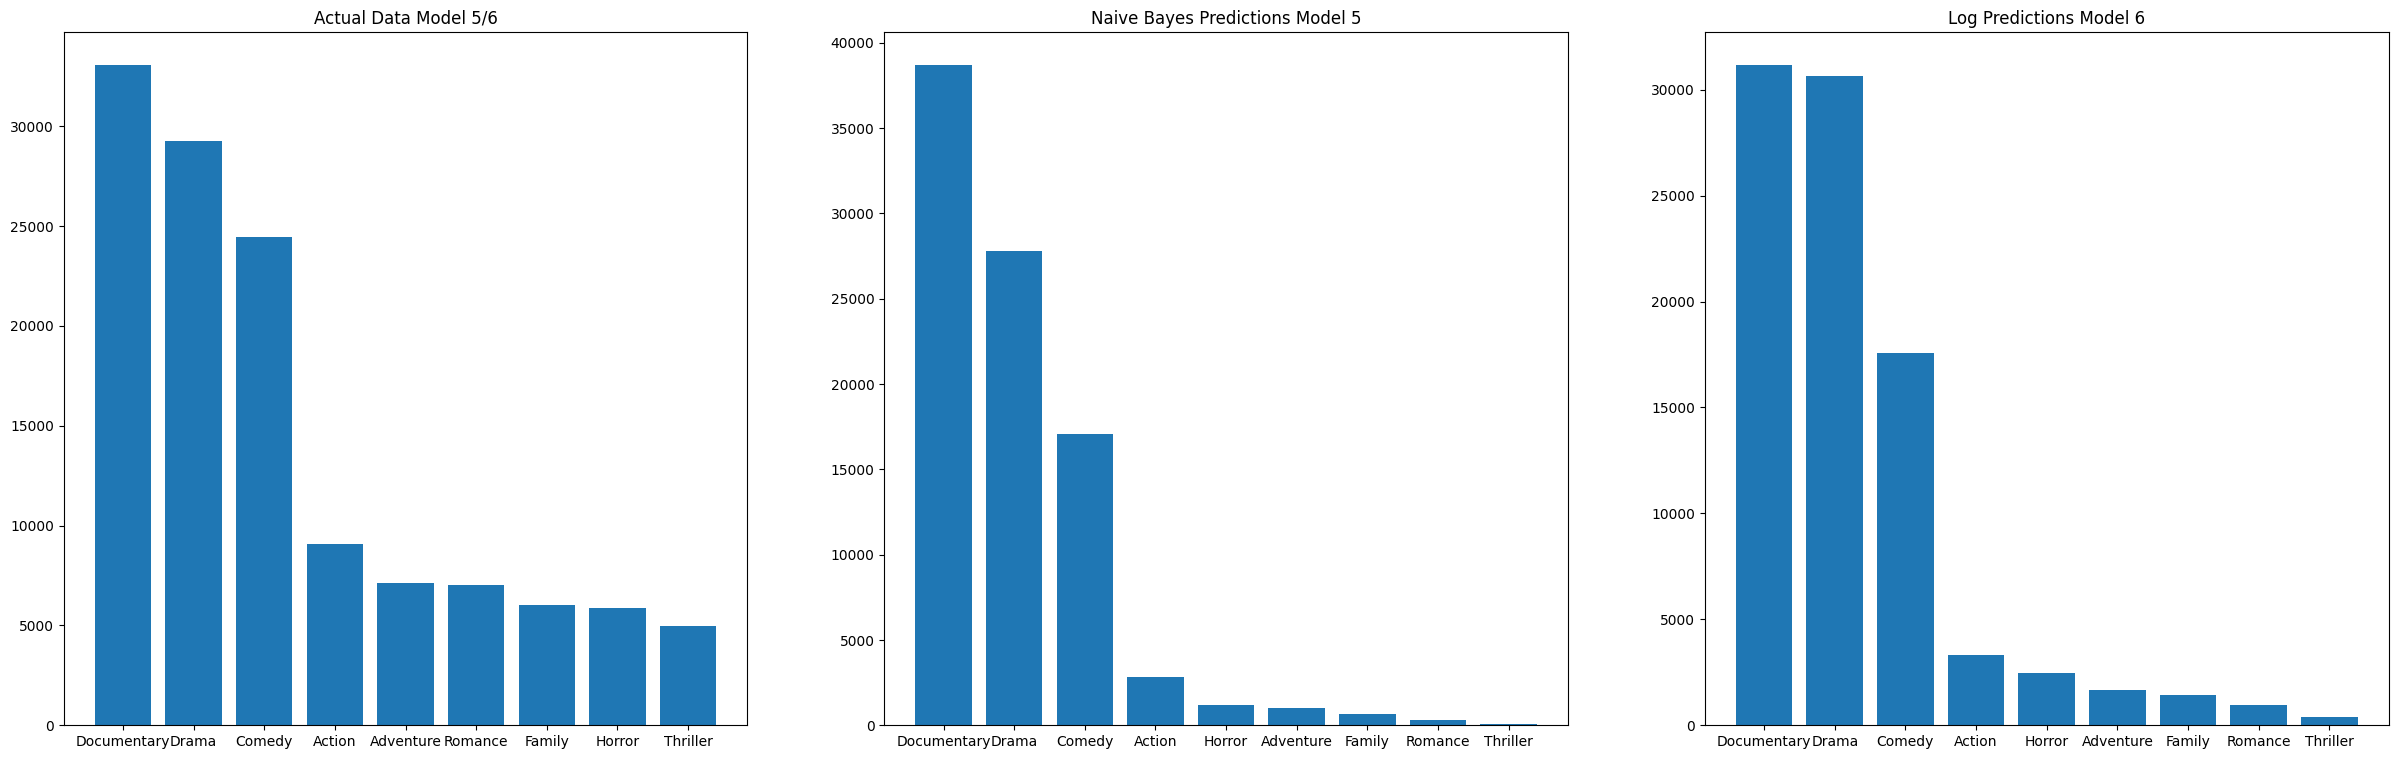

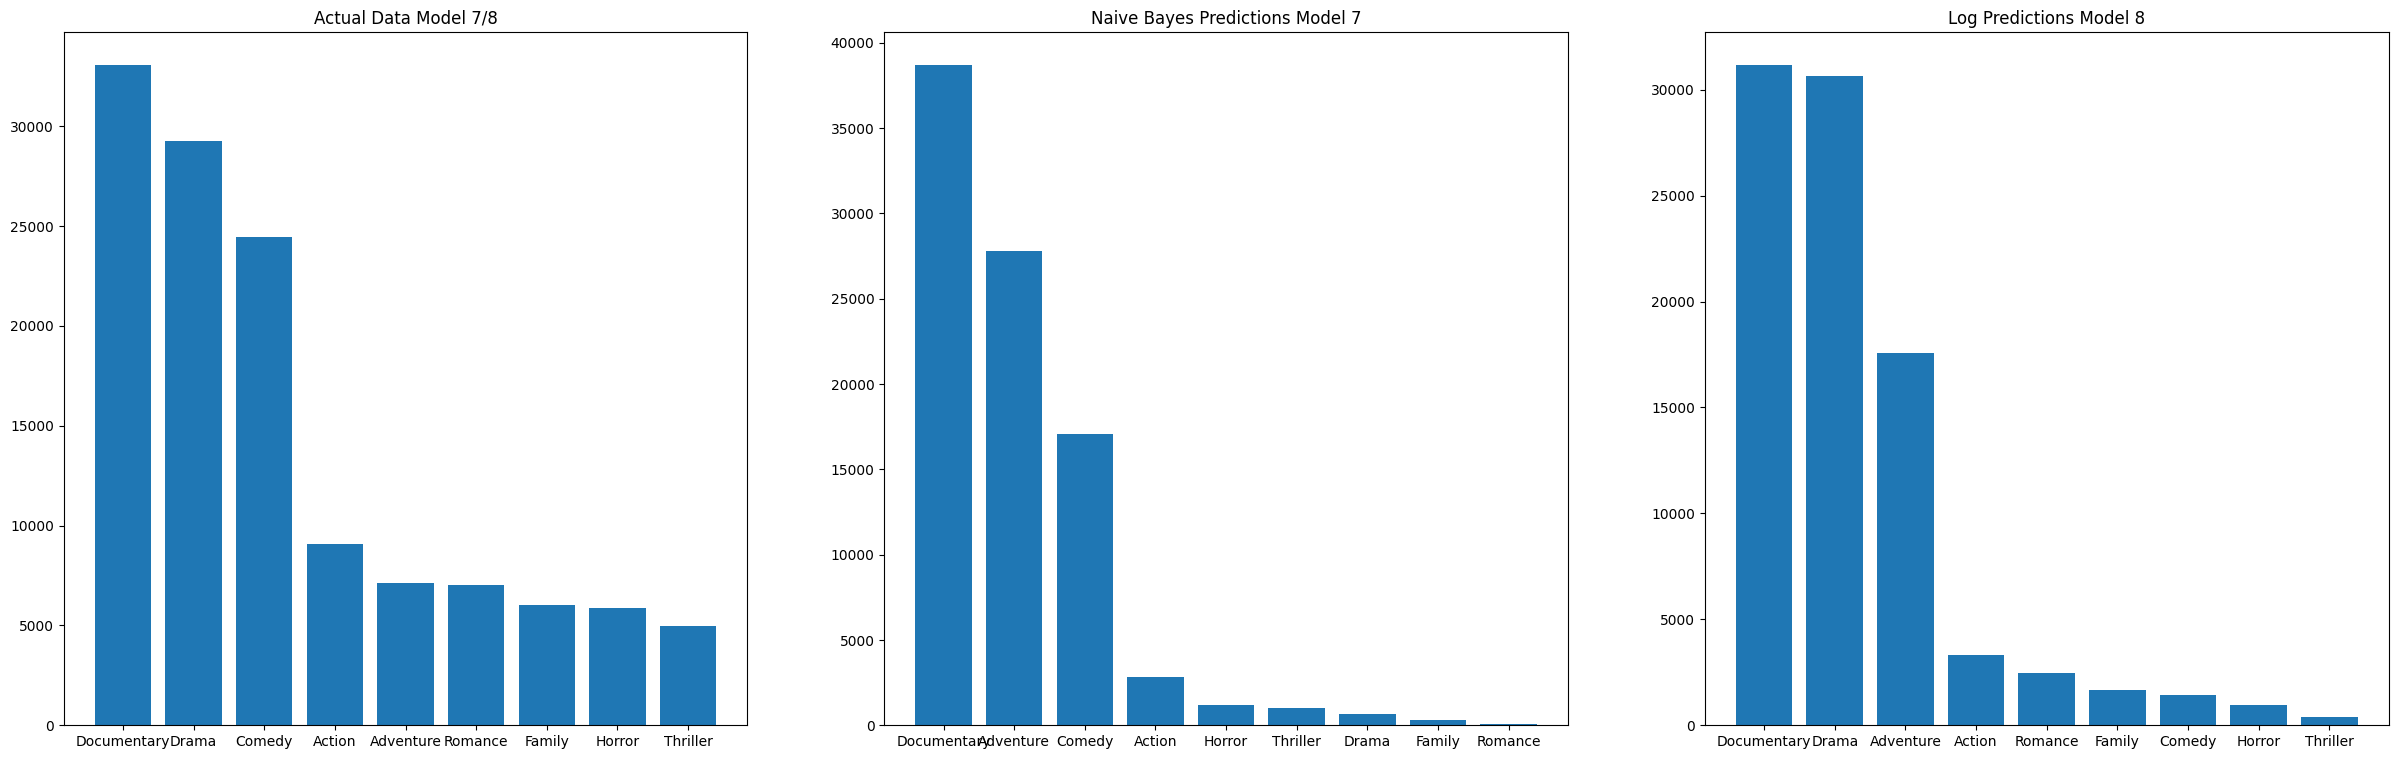

In [ ]:
#Actual Genre Plot
fig, ax = plt.subplots(1, 3, figsize=(30,9))
genres = decode_genre_list(to_1D(df_test['y_test']).value_counts().index.tolist())
count = to_1D(df_test['y_test']).value_counts().values
ax[0].bar(genres,count)
ax[0].set_title('Actual Data Model 5/6')
# plt.xticks(rotation='vertical')
# plt.xlabel('Genre')
# plt.ylabel('# of Titles')

from collections import Counter

#Naive Bayes Plot
genresNB =  decode_genre_list([*Counter(predictions_test)])
countNB = Counter(predictions_test).values()
df_nb = p.DataFrame(
   dict(
      genres=genresNB,
      count=countNB
   )
)
df_nb = df_nb.sort_values('count', ascending=False)
ax[1].bar('genres','count', data=df_nb)
ax[1].set_title('Naive Bayes Predictions Model 5')


genresLog =  decode_genre_list([*Counter(class_predict)])
countLog = Counter(class_predict).values()
df_log = p.DataFrame(
   dict(
      genres=genresLog,
      count=countLog
   )
)
df_log = df_log.sort_values('count', ascending=False)
ax[2].bar('genres','count', data=df_log)
ax[2].set_title('Log Predictions Model 6')

plt.show()

#Actual Genre Plot
fig, ax = plt.subplots(1, 3, figsize=(30,9))
genres = decode_genre_list(to_1D(df_test['y_test']).value_counts().index.tolist())
count = to_1D(df_test['y_test']).value_counts().values
ax[0].bar(genres,count)
ax[0].set_title('Actual Data Model 7/8')
# plt.xticks(rotation='vertical')
# plt.xlabel('Genre')
# plt.ylabel('# of Titles')

from collections import Counter

#Naive Bayes Plot
genresNB =  decode_genre_list([*Counter(predictions_test_4)])
countNB = Counter(predictions_test).values()
df_nb = p.DataFrame(
   dict(
      genres=genresNB,
      count=countNB
   )
)
df_nb = df_nb.sort_values('count', ascending=False)
ax[1].bar('genres','count', data=df_nb)
ax[1].set_title('Naive Bayes Predictions Model 7')


genresLog =  decode_genre_list([*Counter(class_predict_4)])
countLog = Counter(class_predict).values()
df_log = p.DataFrame(
   dict(
      genres=genresLog,
      count=countLog
   )
)
df_log = df_log.sort_values('count', ascending=False)
ax[2].bar('genres','count', data=df_log)
ax[2].set_title('Log Predictions Model 8')

plt.show()

### Limitations
There are a few core limitations to our chosen model, and most are related to just how limited the input is to the model. This affects not only the ability to train the model properly, but also its practicality and application. In training, it caused many issues with less common genres, and even with the smaller chosen list of nine genres, it still causes a heavy tendency towards the most popular genres due to the ambiguity which many titles contain. Many inputs may result in the model returning one of the two most popular genres, drama and documentary, due to the titles being too ambiguous (e.g. “This is us”), short (e.g. “Holes”), or containing unique words such as names of people or places (e.g. “Mrs. Robinson”). Given these factors it is easy to see how our accuracy is lower even given the relatively small number of classes.

### Real World Applications
How does this model project to the real world, given these statistics and limitations? To film-makers, writers, production companies, agents, and anyone else, it allows for a preliminary look into how the name of their movie will be perceived. This applies not only to the average consumer, but also by many search engines or social media platforms which classify content across the internet. With nine possible genres, and 56.4% accuracy, the model is much better than just choosing the most common genre, and depending on the length and ambiguity of the input, the model can give reliable predictions as to how this title will be perceived. Keeping the above listed limitations in mind, and using descriptive words, it should give a result which the average person would have a hard time disagreeing with.
### Learning
This project taught all of us just how much of the machine learning process truly is about the data. In reflection, the majority of our time was spent making data-centered decisions. We needed to decide what to filter out, how we would handle other languages, ambiguous words, and what to do with the difficulties with our class variable, genre. Determining how to enact these changes took time as well, and even running some of them took hours! We also found that any manipulation of data had a large effect on the way we needed to test when running the model, especially because a lot of the manipulations we needed to make were with our target variable. This relationship was evident as the project progressed. The steps in data preparation were many, as well as in testing, whereas the steps in running the model were relatively few. This makes sense however, as a model that cannot be tested, cannot be used, at least not with any confidence! These are the less glorified aspects of machine learning which made all the difference in our ability to complete this project and improve the accuracy of our model.
### Next Steps
Next steps for this project would be to try a pre-built natural language processing model of some kind to perform this classification. This model would preferably be able to take not only the frequency of the words themselves into account, but their meaning, and even better, their meaning in context if possible. This would undoubtedly improve the model significantly, and if trained on the cleaned data which we have, it would be very interesting to see just how much of an improvement could be made. The previously mentioned issues with ambiguity, unique words, and short titles would all still apply, but how much of an effect these things would have on a more sophisticated model would be an interesting experiment to undergo.

# Optimal Model in Production

Try the model out yourself! (The model works better with longer inputs)

In [ ]:
userInput = input("Please Input a Movie Title: " )

userInput = word_tokenize(userInput)
userInput = remove_stop_word(userInput)
userInput = lemmatizeList(userInput)
userInput = TreebankWordDetokenizer().detokenize(userInput)

userInput = count_vector.transform([userInput])
prediction = log_model_4.predict(userInput)
output = decode_prediction(prediction[0])

print(output)

Please Input a Movie Title: Pirate Quest Stolen Treasure
Adventure


### Bibliography
EDUCBA. (2023, March 8). Naive Bayes vs logistic regression: Top 5 differences you should
know. EDUCBA. Retrieved April 6, 2023, from
https://www.educba.com/naive-bayes-vs-logistic-regression/

Ng, A. Y., & Jordan, M. I. (2001, January 1). On discriminative vs. Generative Classifiers:
Proceedings of the 14th International Conference on Neural Information Processing
Systems: Natural and synthetic. Guide Proceedings. Retrieved April 6, 2023, from
https://dl.acm.org/doi/10.5555/2980539.2980648
